## Optimal Threshold for ROC Curve:

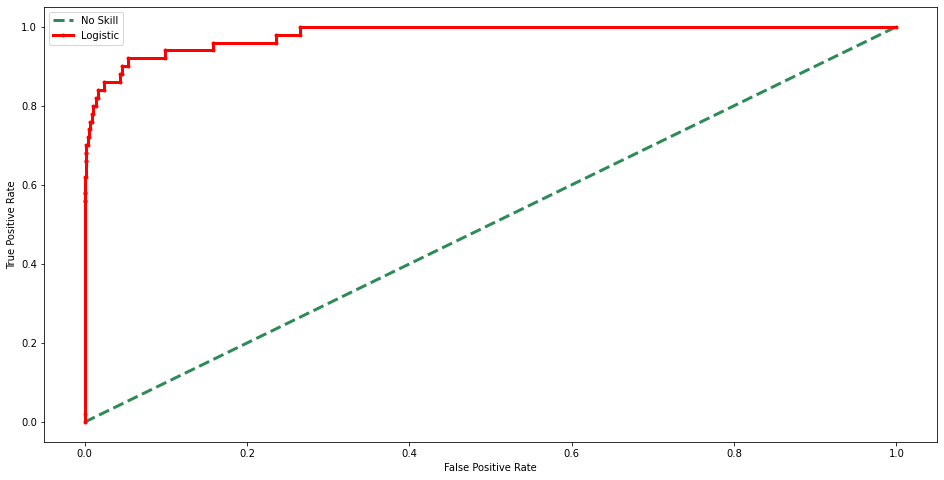

In [28]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

yhat = yhat[:, 1]

fpr, tpr, thresholds = roc_curve(testy, yhat)

plt.figure(figsize=(16,8))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill', color="seagreen", linewidth=3.0)
plt.plot(fpr, tpr, marker='.', label='Logistic', color="red", linewidth=3.0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

Best Threshold=0.016153, G-mean=0.933


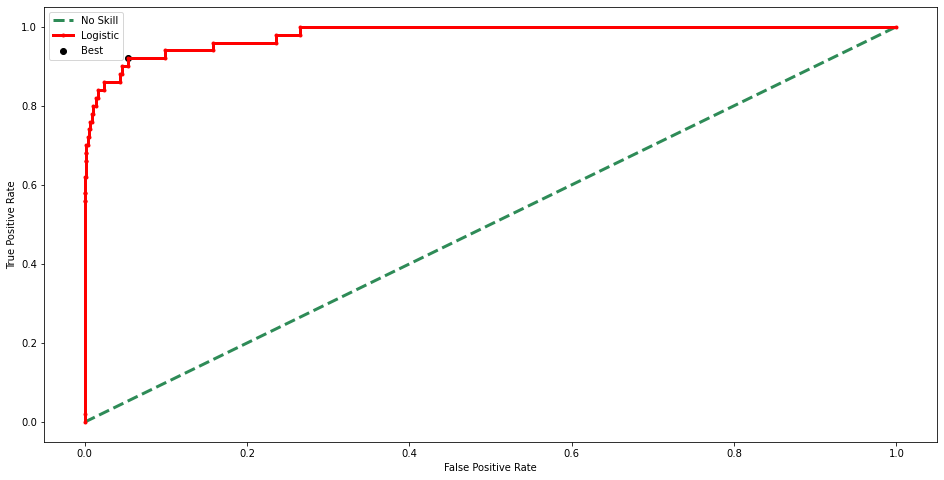

In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

yhat = yhat[:, 1]

fpr, tpr, thresholds = roc_curve(testy, yhat)

gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.figure(figsize=(16,8))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill', color="seagreen", linewidth=3.0)
plt.plot(fpr, tpr, marker='.', label='Logistic', color="red", linewidth=3.0)
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

yhat = yhat[:, 1]

fpr, tpr, thresholds = roc_curve(testy, yhat)

J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.016153


## Optimal Threshold for Precision-Recall Curve:

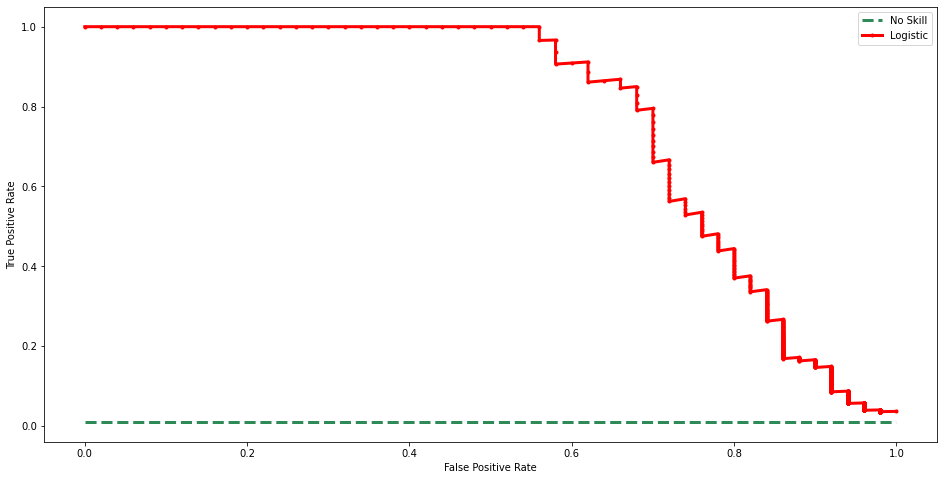

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

yhat = yhat[:, 1]

precision, recall, thresholds = precision_recall_curve(testy, yhat)

no_skill = len(testy[testy==1]) / len(testy)

plt.figure(figsize=(16,8))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill', color="seagreen", linewidth=3.0)
plt.plot(recall, precision, marker='.', label='Logistic', color="red", linewidth=3.0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

Best Threshold=0.256036, F-measure=0.756


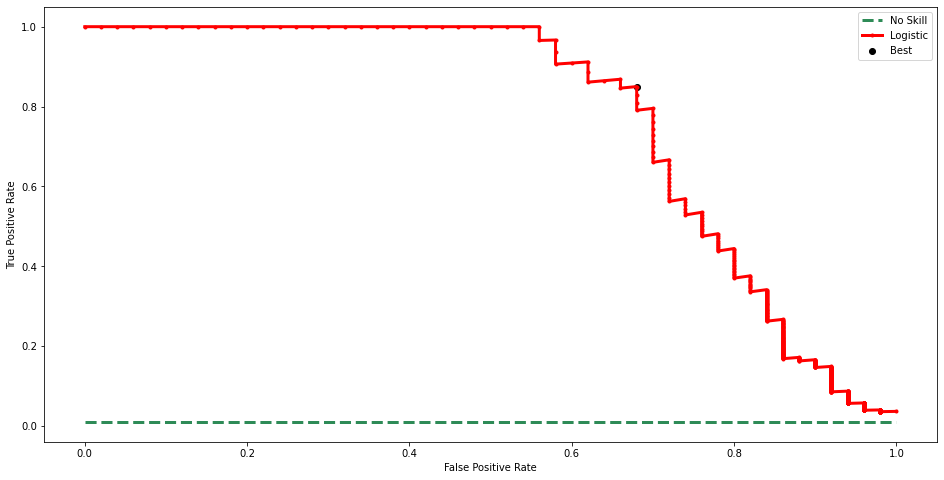

In [32]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

yhat = yhat[:, 1]

precision, recall, thresholds = precision_recall_curve(testy, yhat)

fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-measure=%.3f' % (thresholds[ix], fscore[ix]))

no_skill = len(testy[testy==1]) / len(testy)

plt.figure(figsize=(16,8))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill', color="seagreen", linewidth=3.0)
plt.plot(recall, precision, marker='.', label='Logistic', color="red", linewidth=3.0)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

## Optimal Threshold Tuning

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict(testX)

score = f1_score(testy, yhat)
print('F-measure: %.5f' % score)

F-measure: 0.70130


In [34]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

yhat = model.predict_proba(testX)

probs = yhat[:, 1]

thresholds = np.arange(0, 1, 0.001)

scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.251, F-measure=0.75556


# Probability Calibration:

## SVM With Calibrated Probabilities:

### Standard SVM:

In [35]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.808


In [36]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale')

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.867


In [37]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale', class_weight='balanced')

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.964


## Decision Tree With Calibrated Probabilities:

### Standard Decision Tree (Uncaliberated):

In [38]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.838


### Caliberated:

In [39]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = DecisionTreeClassifier()

calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.857


## Grid Search Probability Calibration With KNN:

In [40]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.863


In [41]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = KNeighborsClassifier()

calibrated = CalibratedClassifierCV(model)

param_grid = dict(cv=[2,3,4], method=['sigmoid','isotonic'])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=calibrated, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.895029 using {'cv': 2, 'method': 'sigmoid'}
0.895029 (0.066617) with: {'cv': 2, 'method': 'sigmoid'}
0.893549 (0.065846) with: {'cv': 2, 'method': 'isotonic'}
0.886835 (0.070207) with: {'cv': 3, 'method': 'sigmoid'}
0.885104 (0.071671) with: {'cv': 3, 'method': 'isotonic'}
0.885167 (0.071732) with: {'cv': 4, 'method': 'sigmoid'}
0.877146 (0.077137) with: {'cv': 4, 'method': 'isotonic'}


# Ensemble Algorithms:

## Bagging for Imbalanced Classification:

### Standard Bagging:

In [42]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = BaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.859


### Bagging With Random Undersampling:

In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.959


# Random Forest for Imbalanced Classification:

### Standard Random Forest:

In [54]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = RandomForestClassifier(n_estimators=10)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.869


### Random Forest With Class Weighting:

In [53]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.874


### Random Forest With Bootstrap Class Weighting:

In [52]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.878


### Random Forest With Random Undersampling:

In [51]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = BalancedRandomForestClassifier(n_estimators=10)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.959


## Easy Ensemble for Imbalanced Classification:

### Easy Ensemble:

In [50]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = EasyEnsembleClassifier(n_estimators=10)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.963


# One-Class Classification:

## One-Class Support Vector Machines:

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = OneClassSVM(gamma='scale', nu=0.01)

trainX = trainX[trainy==0]
model.fit(trainX)

yhat = model.predict(testX)

testy[testy == 1] = -1
testy[testy == 0] = 1

score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.123


## Isolation Forest:

In [47]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = IsolationForest(contamination=0.01)

trainX = trainX[trainy==0]
model.fit(trainX)

yhat = model.predict(testX)

testy[testy == 1] = -1
testy[testy == 0] = 1

score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.000


## Minimum Covariance Determinant:

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = EllipticEnvelope(contamination=0.01)

trainX = trainX[trainy==0]
model.fit(trainX)

yhat = model.predict(testX)

testy[testy == 1] = -1
testy[testy == 0] = 1

score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.157


## Local Outlier Factor:

In [44]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor

def lof_predict(model, trainX, testX):

    composite = np.vstack((trainX, testX))

    yhat = model.fit_predict(composite)

    return yhat[len(trainX):]

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LocalOutlierFactor(contamination=0.01)

trainX = trainX[trainy==0]
model.fit(trainX)

yhat = lof_predict(model, trainX, testX)

testy[testy == 1] = -1
testy[testy == 0] = 1

score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.138
